In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# http://graphics.cs.ucdavis.edu/education/CAGDNotes/Chaikins-Algorithm/Chaikins-Algorithm.html

In [13]:
def emptyImage(SIZE=600):
    img=np.zeros((SIZE,SIZE,3),dtype=np.uint8)
    return img
def drawAndshowImage(img,paths,color=(255,0,0),show=True):
    for path in paths:
        cv2.polylines(img,[np.array(path)],False,color,2)
    for pt in path:
        cv2.circle(img,tuple(pt),3,color,2)
    if show:
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.axis('off')

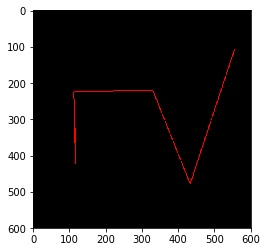

In [14]:
pts=np.array([[117, 424], [112, 225], [329, 220], [432, 478], [554, 109]])
img=emptyImage()
_=cv2.polylines(img,[pts],False,(255,0,0),thickness=2)
plt.imshow(img)

In [15]:
def chaikins(path,ratio=1/4):
    '''
    path:list of point(n+1),(x0,y0)...(xn,yn)
    
    chaikins的做法是每个边 生成2个新点(Ri,Qi)
    分别在ratio,1-ratio,这样n个遍
    处理后就有2N个点，2N-1个遍，把这些新点返回
    '''
    ratio=1-ratio
    V=len(path)
    if isinstance(path,list):
        path=np.array(path)
    assert V>2,'必须是3个点以上才有意义'
    assert path.shape[1]==2,'必须是2维的'
    #R=ratio*startpoint+(1-ratio)*endpoint
    #Q=(1-ratio)*startpoint+ratio*endpoint     
    R=ratio*path[:-1]+(1-ratio)*path[1:]
    Q=(1-ratio)*path[:-1]+ratio*path[1:]
    
    r=np.zeros((2*len(R),2),dtype=np.int32)
    r[0::2]=R
    r[1::2]=Q
    
    assert 2*(V-1)==len(r)
    return r

(-0.5, 599.5, 599.5, -0.5)

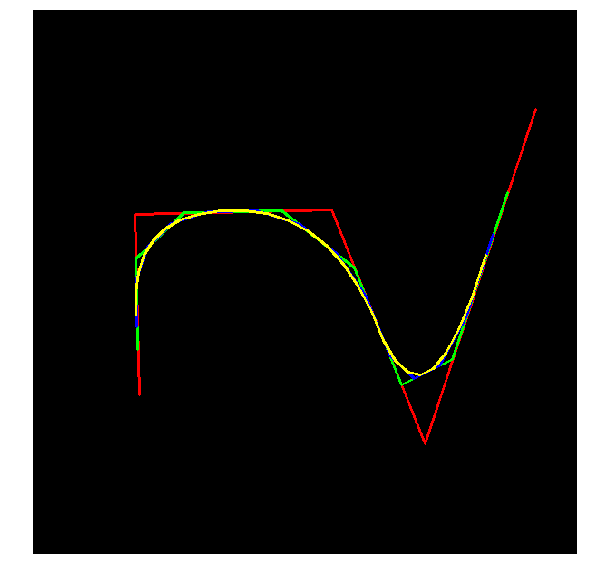

In [16]:
color=[(255,0,0),(0,255,0),(0,0,255),(255,255,0)]
# color=[(255,0,0),(0,255,0)]

# current=pts
# current=np.array([[140, 468], [79, 307], [308, 187], [329, 465],[140, 468]])
current=np.array([[117, 424], [112, 225], [329, 220], [432, 478], [554, 109]])
img=emptyImage()
for i in range(len(color)):
    _=cv2.polylines(img,[current],False,color[i],thickness=2)
    current=chaikins(current)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

### subdivison surface

In [17]:
def createPathFromArray(points,flag='row'):
    '''
    points 是mxn的数组，那么说明有m行,n列
    我要做的就是返回这些路径
    
    返回:list of path(list of (x,y))
    '''
    if isinstance(points,list):
        points=np.array(points)
    
    m,n=points.shape[:2]
    paths=[]
    
    if flag!='col':
        for i in range(m):
            p=[points[i][j] for j in range(n)]
            paths.append(p)
    if flag!='row':
        for j in range(n):
            p=[points[i][j] for i in range(m)]
            paths.append(p)
    paths=np.array(paths)
    return paths
def chaikins_2D(points,ratio=1/4):
    '''
        pts是m,n的数组，对这两个维度分别运行chaikon一维算法，得到
        二维的chankins
    '''
    if isinstance(points,list):
        points=np.array(points)
    m,n=points.shape[:2]
    #每一行看成1个1D的path，有m个这样的path,运行m个一维chainkins后
    #行数不变，还是m,列数变了(2(n-1))
    rowpaths=createPathFromArray(points,'row')

    rowpaths_chaikins=[chaikins(p,ratio) for p in rowpaths]
    points=np.array(rowpaths_chaikins)
  
    
    #每一列看成一个1Dpath,有n_new个，运行n_new个一维chainkins后，
    #行数m被扩成了
    colpaths=createPathFromArray(points,'col')
    colpaths_chaikins=[chaikins(p,ratio) for p in colpaths]
    points=np.array(colpaths_chaikins).transpose((1,0,2))

    
    assert (2*(m-1),2*(n-1))==points.shape[:2]
    
    return points

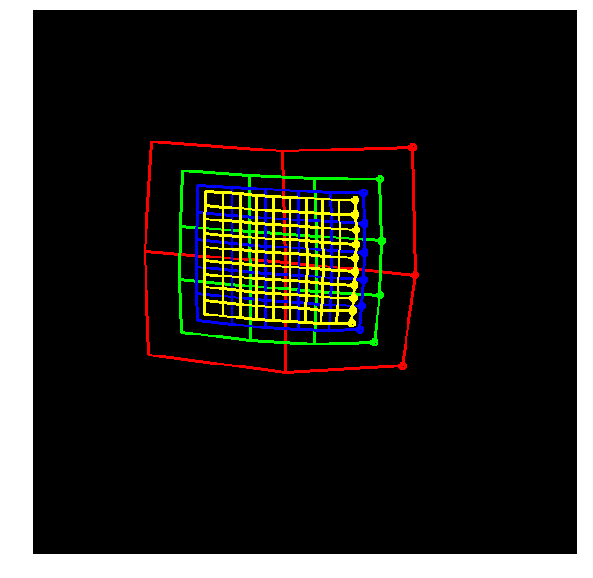

In [22]:
color=[(255,0,0),(0,255,0),(0,0,255),(255,255,0)]
pts=[
    
    [
        [130, 145], [275, 155], [418, 151]
    ], 
    [
        [123, 266], [278, 278], [421, 292]
    ], 
    [
        [127, 380], [278, 399], [407, 392]
    ]
    
    ]


img=emptyImage()
color=[(255,0,0),(0,255,0),(0,0,255),(255,255,0)]
for i,c in enumerate(color):
    if i>0:
        pts=chaikins_2D(pts)
    paths=createPathFromArray(pts,'all')
    
    drawAndshowImage(img,paths,c,show=(i==len(color)-1))